# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NY-Mahattan (Regression)

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Preparing data

In [2]:
# Import the data as Pandas DataFrame as follows
df = pd.read_csv("df_man_k5.csv")

In [3]:
df.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
0,12,21,6,39,10000,40.712177,-74.005564,3
1,8432,15070,2338,25840,10001,40.749185,-73.992193,1
2,7293,14630,3532,25455,10002,40.716748,-73.987393,1
3,6705,11991,1785,20481,10003,40.732359,-73.989222,2
4,526,1000,267,1793,10004,40.703835,-74.012490,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FELONY       55 non-null     int64  
 1   MISDEMEANOR  55 non-null     int64  
 2   VIOLATION    55 non-null     int64  
 3   Crime        55 non-null     int64  
 4   zip          55 non-null     int64  
 5   latitude     55 non-null     float64
 6   longitude    55 non-null     float64
 7   K_mean       55 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.6 KB


## 2. Split train-target data

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
train_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
4,526,1000,267,1793,10004,40.703835,-74.012490,3
47,2658,3792,1009,7459,10128,40.781430,-73.949867,0
27,3261,7153,1952,12366,10030,40.818805,-73.942749,4
46,10,31,4,45,10115,40.810958,-73.964054,0
45,1511,1592,229,3332,10111,40.758623,-73.979097,0


In [7]:
test_set.head()

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude,K_mean
31,3627,5519,1385,10531,10034,40.865468,-73.921800,4
5,240,716,107,1063,10005,40.706641,-74.009439,3
32,7227,14208,2827,24262,10035,40.800638,-73.936813,1
13,4487,5593,1217,11297,10014,40.734239,-74.004837,2
19,4809,5759,1170,11738,10022,40.759687,-73.968911,2


### Numerical variables
- latitude
- longitude

### Categorical variables
- K-mean (Cluster using K-mean)

### Target
- Target variables: number of crimes

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ["latitude", "longitude"]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ["K_mean"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

full_pipeline = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.fit_transform(test_set)

In [9]:
train_prepared.shape

(38, 7)

In [10]:
test_prepared.shape

(17, 7)

In [11]:
# Save labels (target)
train_labels = train_set["Crime"].copy()
test_labels = test_set["Crime"].copy() 

## 3. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
# Train LinearRegressor
lr = LinearRegression()
lr.fit(train_prepared, train_labels)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error
lr_train_pred = lr.predict(train_prepared)
lr_mse_train = mean_squared_error(train_labels, lr_train_pred)
lr_rmse_train = np.sqrt(lr_mse_train)
lr_rmse_train

2530.1578379989246

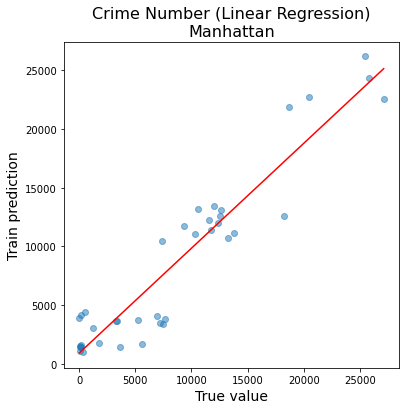

In [14]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, lr_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)\nManhattan",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), lr_train_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

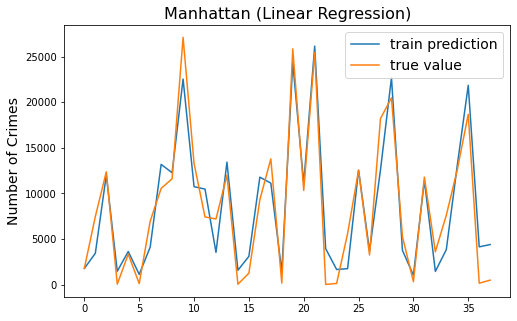

In [15]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(train_prepared)), lr_train_pred, label="train prediction")
_ = plt.plot(range(len(train_prepared)), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Manhattan (Linear Regression)",fontsize=16)

In [16]:
lr_test_pred = lr.predict(test_prepared)

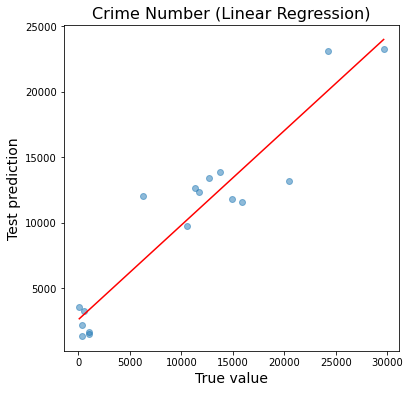

In [17]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels,lr_test_pred, alpha=0.5)
#plt.xlim([0,800])
#plt.ylim([0,800])
plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Linear Regression)",fontsize=16)

#Fitted line
line = LinearRegression()
line.fit(np.array(test_labels).reshape(-1,1), lr_test_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

In [18]:
from scipy.stats import pearsonr
corr, _ = pearsonr(lr_test_pred, test_labels)
r2 = corr**2
r2

0.8959159544295822

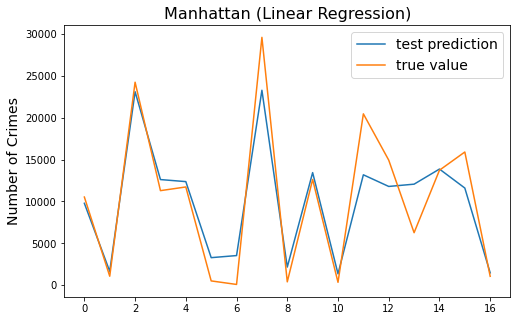

In [19]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(len(test_prepared)), lr_test_pred, label="test prediction")
_ = plt.plot(range(len(test_prepared)), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Manhattan (Linear Regression)",fontsize=16)

## 4. Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [21]:
from sklearn.metrics import mean_squared_error
rf_train_pred = forest_reg.predict(train_prepared)
rf_mse_train = mean_squared_error(train_labels, rf_train_pred)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_train

1413.7720105560088

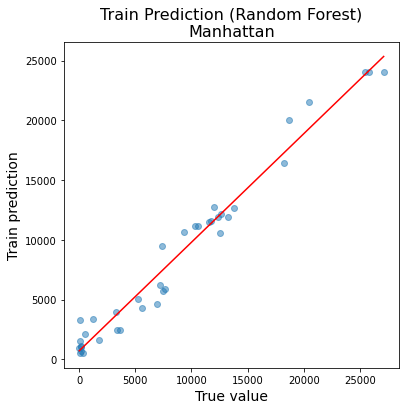

In [22]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(train_labels, rf_train_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Train prediction", fontsize=14)
_ = plt.title("Train Prediction (Random Forest)\nManhattan", fontsize = 16)

#Fitted line
line = LinearRegression()
line.fit(np.array(train_labels).reshape(-1,1), rf_train_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(train_labels),max(train_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

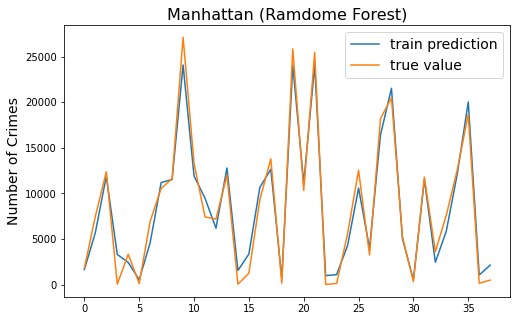

In [23]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(38), rf_train_pred, label="train prediction")
_ = plt.plot(range(38), train_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Manhattan (Ramdome Forest)",fontsize=16)

In [24]:
rf_test_pred = forest_reg.predict(test_prepared)
rf_mse_test = mean_squared_error(test_labels, rf_test_pred)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_rmse_test

4101.383527747249

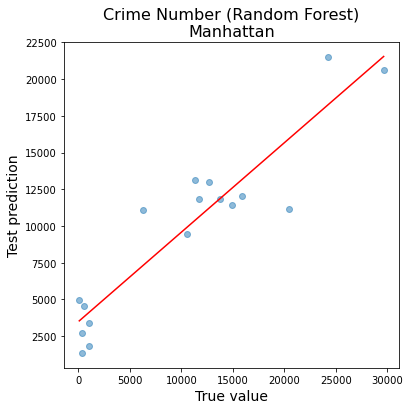

In [25]:
fig = plt.figure(figsize=(6, 6))
_ = plt.scatter(test_labels, rf_test_pred, alpha=0.5)
_ = plt.xlabel("True value", fontsize=14)
_ = plt.ylabel("Test prediction", fontsize=14)
_ = plt.title("Crime Number (Random Forest)\nManhattan", fontsize = 16)

#Fitted line
line = LinearRegression()
line.fit(np.array(test_labels).reshape(-1,1), rf_test_pred)
b = line.intercept_
a = line.coef_[0]
x = np.linspace(min(test_labels),max(test_labels),100)
y = a*x+b
_ = plt.plot(x,y,'-r')

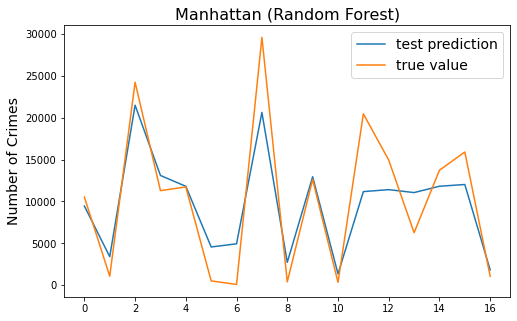

In [26]:
fig = plt.figure(figsize=(8, 5))
_ = plt.plot(range(17), rf_test_pred, label="test prediction")
_ = plt.plot(range(17), test_labels, label="true value")
_ = plt.legend(fontsize=14)
_ = plt.ylabel("Number of Crimes",fontsize=14)
_ = plt.title("Manhattan (Random Forest)",fontsize=16)

In [27]:
from scipy.stats import pearsonr
corr_rf, _ = pearsonr(rf_test_pred, test_labels)
r2_rf = corr_rf**2
r2_rf

0.8633324623575842